# ボストン住宅価格線形回帰

## 線形回帰とは何か

線形回帰とは何か。
具体的に言うと？
分類と何か違うのか

回帰分析とは、予測したいデータを、すでにわかっているデータとの関係性を元に推定するアプローチ。
例えば、毎分２L水がたまるタンクがあったとすると
V(L)を水の容量、t(m)を時間とした時に
V=4tというモデルができる。
ここで線形であるというのはtが１次（２乗になっていない）ということを表す.
また、目的変数が連続値ではなく離散値の場合は分類と呼ばれる。

## ライブラリのインポート

In [379]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import datasets
% matplotlib inline

 ## データを取得する
 sklearnのload_boston()メソッドを使用して、データを取得しましょう。

In [380]:
from sklearn.datasets import load_boston
boston = load_boston()


## 取得データをDataFrameにする
pd.DataFrameを使用して、データを説明変数と目的変数に分けましょう。

今回の課題では、説明変数がload_boston().dataで、目的変数は、load_boston().targetより取得できます。

※load_boston()には、データを取得した際に代入したインスタンスが入ります。

In [381]:
X = boston.data
y = boston.target

In [382]:
#データセットの説明を読む
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [383]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y= pd.DataFrame(boston.target)

In [384]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 説明変数を'LSTAT'のみにする
 ### ←全部の特徴で検証してみました
## テストデータに分割する
sklearnのsklearn.model_selection.train_test_splitを使用して、データセットのデータを8対2(テスト)に分けましょう。
※データの形状を確認する
きちんと分割されているかshapeメソッドを使用して確認すると良いでしょう。
## 学習
LinearRegression()を使用してインスタンスを作成し、fitメソッドを使用して学習を行いましょう
## 決定係数
scoreメソッドを使用して、決定係数を求めましょう

In [385]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [386]:
features_list = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

In [387]:
from sklearn.linear_model import LinearRegression
for feature in features_list :
    feature_data=X[feature]
    from sklearn.model_selection import train_test_split
    (X_train, X_test,
     y_train, y_test) = train_test_split(
        feature_data, y, test_size=0.2, random_state=0,
    )

    #インスタンスの作成
    model= LinearRegression()
    #学習
    #fit(x,y) xが対象データ、yが正解データ
    #４０４行のデータを、404×1のデータに変換
    # #https://deepage.net/features/numpy-newaxis.html
    #https://deepage.net/features/numpy-reshape.html
    #Numpyに配列に次元を追加する方法は主に２つある
    #Numpy配列のスライシングnp.newaxisを指定することで、使われた次元に要素数１の新たな軸axisを追加
    #することになる。np.newaxisをNoneで代用することも可能だが可読性の観点からnp.newaxisを使う
    model.fit(X_train[:,np.newaxis],y_train)
    score=model.score(X_train[:,np.newaxis],y_train)
    print("一次式における {}の決定係数は{}".format(feature ,score))
    print('------------------------------------------------------------------------')

一次式における CRIMの決定係数は0.16639537211980848
------------------------------------------------------------------------
一次式における ZNの決定係数は0.16795610271641104
------------------------------------------------------------------------
一次式における INDUSの決定係数は0.2756821153366341
------------------------------------------------------------------------
一次式における CHASの決定係数は0.03154893785540236
------------------------------------------------------------------------
一次式における NOXの決定係数は0.2112013354442649
------------------------------------------------------------------------
一次式における RMの決定係数は0.4970800097843844
------------------------------------------------------------------------
一次式における AGEの決定係数は0.17085002205933963
------------------------------------------------------------------------
一次式における DISの決定係数は0.07896827357780933
------------------------------------------------------------------------
一次式における RADの決定係数は0.1807379443793754
------------------------------------------------------------------------
一次式における TAXの

## 2,3,4次式の回帰
PolynomialFeatures()とfit_transform()メソッドを使用して、2,3,4次式の回帰に挑戦しましょう。ここでも学習を行い、決定係数を求めましょう。

In [388]:
from sklearn.preprocessing import PolynomialFeatures
for feature in features_list :
    feature_data=X[feature]
    from sklearn.model_selection import train_test_split
    (X_train, X_test,
     y_train, y_test) = train_test_split(
        feature_data, y, test_size=0.2, random_state=0,
    )
    #インスタンスを作成
    degree_2=PolynomialFeatures(degree=2)
    degree_3=PolynomialFeatures(degree=3)
    degree_4=PolynomialFeatures(degree=4)

    x_train_2=degree_2.fit_transform(X_train[:,np.newaxis])
    x_train_3=degree_3.fit_transform(X_train[:,np.newaxis])
    x_train_4=degree_4.fit_transform(X_train[:,np.newaxis])
    
    #2~4次元の線形回帰のインスタンスを作成
    model_2d =  LinearRegression()
    model_3d =  LinearRegression()
    model_4d =  LinearRegression()
    #学習
    model_2d.fit(x_train_2,y_train)
    model_3d.fit(x_train_3,y_train)
    model_4d.fit(x_train_4,y_train)
    x_test_2 = degree_2.fit_transform(X_test[:,np.newaxis])
    x_test_3 = degree_3.fit_transform(X_test[:,np.newaxis])
    x_test_4 = degree_4.fit_transform(X_test[:,np.newaxis])

    score_2d = model_2d.score(x_test_2,y_test)
    score_3d = model_3d.score(x_test_3,y_test)
    score_4d = model_4d.score(x_test_4,y_test)
    print("2次式における {}の決定係数は{}".format(feature ,score_2d))
    print("3次式における {}の決定係数は{}".format(feature ,score_3d))
    print("4次式における {}の決定係数は{}".format(feature ,score_4d))
    print('-------------------------------------------------------------------------')

2次式における CRIMの決定係数は0.060727008422610584
3次式における CRIMの決定係数は0.046805071251852404
4次式における CRIMの決定係数は0.029078068673772828
-------------------------------------------------------------------------
2次式における ZNの決定係数は-0.04782028287286155
3次式における ZNの決定係数は-0.024193650231187913
4次式における ZNの決定係数は-0.024535754669651633
-------------------------------------------------------------------------
2次式における INDUSの決定係数は0.00890578926036345
3次式における INDUSの決定係数は-0.013902247840995585
4次式における INDUSの決定係数は-0.009802723396888924
-------------------------------------------------------------------------
2次式における CHASの決定係数は0.025489641189190726
3次式における CHASの決定係数は0.02549492612726334
4次式における CHASの決定係数は0.025497788505434493
-------------------------------------------------------------------------
2次式における NOXの決定係数は0.05631534187843634
3次式における NOXの決定係数は0.07085272234828188
4次式における NOXの決定係数は0.07180315933274706
-------------------------------------------------------------------------
2次式における RMの決定係数は0.5112919807602372
3次式における RMの決定係数は0

## 単回帰と重回帰の違いについて記述せよ

重回帰分析とは 単回帰分析が、1つの目的変数を1つの説明変数で予測したのに対し、重回帰分析は1つの目的変数を複数の説明変数で予測しようというもの。
一般的に重回帰分析は誤差を小さくすることができ、予測の精度をあげることができる。一方で、モデルの説明変数を必要以上に増やせば増やすほど、学習データのシグナルだけでなく、ノイズにまでフィットしてしまう。

## 決定係数とは何か記述せよ
重回帰分析の結果を読み取る指標のひとつ「決定係数」。１に近いほど分析の精度が高いことを表す。しかし、決定係数だけに気を取られていると分析結果を読み違えてしまうこともある。
この数字は「回帰分析をした結果が目的変数のばらつき（分散）をどれくらい説明しているか」によって定義される。
決定係数を求めるためには、実際のデータと推定された回帰式から「全変動」「回帰変動」「残差変動」の３つを求める必要がある。ここでは実際のデータを$(x_i,y_i)$、回帰式から推定されたデータを$(x_i,\hat{y}_i)$、データ全体から求められる平均値を$(\bar{x},\bar{y})$とする。
- 「全変動」：実際のデータとデータ全体の平均値との差を表す。（下の図の緑の部分）
- 「回帰変動」：推定された回帰式から得られた予測値とデータ全体の平均値の差を表す。
- 「残差変動」：実際のデータと推定された回帰式から得られた予測値との差を表す。

![決定係数](http://bellcurve.jp/statistics/wp-body/wp-content/uploads/2017/01/795316b92fc766b0181f6fef074f03fa-16.png)

これらの変動を二乗和として算出する。
決定係数は説明変数が目的変数をどれくらい説明しているか、つまり「回帰変動が全変動に対してどれだけ多いか＝残差変動が全変動に対してどれだけ少ないか」を表すものである。したがって決定係数は、回帰変動を全変動で割ることになる

![決定係数](http://ifs.nog.cc/gucchi24.hp.infoseek.co.jp/MRA1.files/image056.jpg)

## 決定係数をいかなる場合も信じても良いか記述せよ(決定係数が高ければ、汎用性があるモデルと言えるか)
決定係数が正しく評価できない例を答えよ
ヒント

データ数の視点から記述してみましょう。

参考

http://xica.net/magellan/marketing-idea/stats/about-coefficient-of-determination/



決定係数が高ければなんでもいいという訳ではない。

データ数の観点から、大きなサイズの母集団から無作為に抽出された、サンプルを使用して回帰分析を行い、そこで得られた回帰係数を元に決定係数を算出する場合、このケースでの決定係数はサンプルに対しての精度が高くなるよう求められたものである。つまり、母集団とサンプルとの性質に乖離があると、母集団の文脈にそぐう結果が算出されない可能性がある。
また、決定係数は説明変数を追加するにしたがって単調に増加し１に近くづく性質がある。つまり、被説明変数と直接関係のない変数を説明変数として追加しても決定係数が上がる。。
決定係数はあくまで、予測の当てはまりの良さを示す指標で分析の目的や仮説とは関係のない変数を無秩序の分析に加えてしまうとモデルの解釈が難しくなる。

このような問題を解消するために、「自由度調整済み決定係数」が使用される。値を修正するために、サンプル数と説明変数の個数から求められる自由度という概念を使用しているためにこのような名前がついている。
統計的には母集団の性質を求めるのが通常なので、説明変数が多い場合は決定係数ではなく、自由度調整済み決定係数の値をより重要視すべきとされている。

https://www-cc.gakushuin.ac.jp/~20130021/ecmr/chapter3.pdf
http://ryotamugiyama.com/2018/07/02/rsquared/

## 次数が大きくなるとどうなるか記述せよ
説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b）
次数を増やすとどのようなメリットが考えられるか,
次数を増やすとどのようなデメリットが考えられるか

説明変数を増やすことで、表現力が上がり決定係数は１に単調増加しながら近く。
しかし、目的変数との関係の薄い説明変数に含まれるノイズも取り入れて学習してしまうため過学習しやすくなる。


## 重回帰
今回は、LSTATのみを使用したが、他の特徴量も使用して学習させましょう。重回帰を使用して、0.71以上の決定係数出れば合格です。

ヒント

すべての特徴量を使用せず、相関が強い特徴量のみを使用してみましょう。
次数を変更してみましょう。

In [331]:
X = boston.data
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y= pd.DataFrame(boston.target)

In [338]:
X = boston.data
X.shape

(506, 13)

In [339]:
correlation_matrix = np.corrcoef(X.transpose())

In [340]:
dataset = datasets.load_boston()
features = dataset.data
feature_names = dataset.feature_names

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


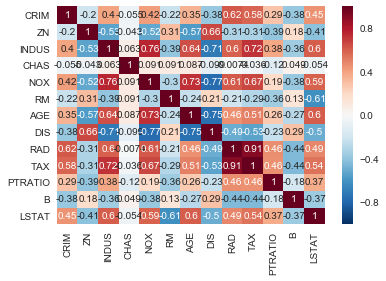

In [341]:
sns.heatmap_mstrix = np.corrcoef(X.transpose())
# 相関行列のヒートマップを描く
sns.heatmap(correlation_matrix, annot=True,
            xticklabels=feature_names,
            yticklabels=feature_names)

# グラフを表示する
plt.show()

In [365]:
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.DataFrame(boston.target)

X=X.loc[:, ['LSTAT','RM','RAD']]
#X=X['LSTAT']['RAD'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

degree_2 = PolynomialFeatures(degree=2)
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

x_train_2 = degree_2.fit_transform(X_train)
x_train_3 = degree_3.fit_transform(X_train)
x_train_4 = degree_4.fit_transform(X_train)

lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

lin_2d.fit(x_train_2,y_train)
lin_3d.fit(x_train_3,y_train)
lin_4d.fit(x_train_4,y_train)

x_test_2 = degree_2.fit_transform(X_test)
x_test_3 = degree_3.fit_transform(X_test)
x_test_4 = degree_4.fit_transform(X_test)

score_2d = lin_2d.score(x_test_2,y_test)
score_3d = lin_3d.score(x_test_3,y_test)
score_4d = lin_4d.score(x_test_4,y_test)

print("二次式における住宅価格への決定係数は{}".format(score_2d))
print("三次式における住宅価格への決定係数は{}".format(score_3d))
print("四次式における住宅価格への決定係数は{}".format(score_4d))

二次式における住宅価格への決定係数は0.6841920735857199
三次式における住宅価格への決定係数は0.7113550921911396
四次式における住宅価格への決定係数は0.6376893527952786


## 説明変数'LSTAT','RM','RAD'の３次式で0.71を超えた

## 重回帰について記述せよ

複数の特徴量を使う回帰を重回帰という。 特徴量を増やせば、誤差関数の誤差が小さくなり、決定係数の値をより高めることが可能で、予測の精度をより向上させることができるというメリットがある。 ただデメリットとしては次数を増やすことによって決定係数の数値がかなり悪くなってしまうことがある。説明変数を増やし、次数をあげると精度と表現力が向上する一方で過学習がおこってしまうというデメリットがある。